In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

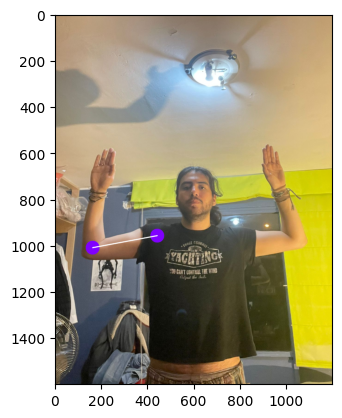

In [18]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


with mp_pose.Pose(static_image_mode = True) as pose:

    image = cv2.imread("image.jpeg")
    height, width, _ = image.shape
    image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    result = pose.process(image_rgb)
    #print("Pose Landmarks:", result.pose_landmarks)

    
    if result.pose_landmarks is not None:
        #mp_drawing.draw_landmarks(image_rgb,result.pose_landmarks, mp_pose.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color=(128,0,250),thickness=2,circle_radius=3),mp_drawing.DrawingSpec(color=(255,255,255),thickness=2))
        x1 = int(result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * width)
        y1 = int(result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * height)
        # int(result.pose_landmarks.landmark[joint_num].x * width)

        x2 = int(result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * width)
        y2 = int(result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * height)


        cv2.circle(image_rgb, (x1,y1), 30, (128, 0, 255), -1)
        cv2.circle(image_rgb, (x2,y2), 30, (128, 0, 255), -1)
        cv2.line(image_rgb, (x1,y1),(x2,y2), (255, 255, 255), 3)


    plt.imshow(image_rgb)
